In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# PART 1 - MACHINE LEARNING
# Task 1.1 - Data Preparation
# Loading dataset. 
data = pd.read_excel('ENB2012_data.xlsx')
print(data)

# Extracting inputs.
inputs = data.values[:,:8].astype(float)
targets = data.values[:,8:].astype(float)

# Projecting data into 2 dimensions with PCA.
pca = PCA(n_components = 2)
compressed = pca.fit_transform(inputs)

# Scaling the data.
scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)

print(inputs.ptp(axis=0))
print(scaled.ptp(axis=0))

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]
[  0.36 294.   171.5  110.25   3.5    3.     0.4    5.  ]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
# Part 1 - Machine Learning - Regression

# Making training and testing data.
X_train, X_test, y_train, y_test = train_test_split(compressed, targets, test_size = 0.2, random_state = 0)

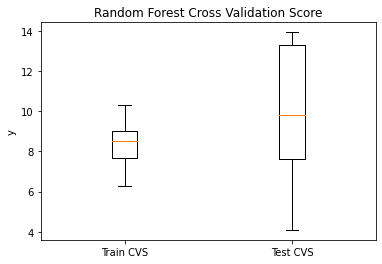

In [46]:
# Random Forest Regressor.
def random_forest_regressor():
    for i in range(100):
        regressor = RandomForestRegressor()
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        x_pred = regressor.predict(y_test)
    train_scores = cross_val_score(regressor, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")
    test_scores = cross_val_score(regressor, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")
        
    
    plt.figure()
    plt.title("Random Forest Cross Validation Score")
    plt.boxplot([abs(train_scores), abs(test_scores)])
    plt.xticks([1, 2], ["Train CVS", "Test CVS"])
    plt.ylabel("y")
    plt.show()

random_forest_regressor()

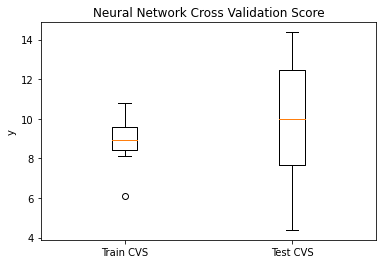

In [58]:
# Neural Network.
def neural_network():
    for i in range(100):
        regressor = MLPRegressor(max_iter = 4500)
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        x_pred = regressor.predict(y_test)
    train_scores = cross_val_score(regressor, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")
    test_scores = cross_val_score(regressor, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")

    plt.figure()
    plt.title("Neural Network Cross Validation Score")
    plt.boxplot([abs(train_scores), abs(test_scores)])
    plt.xticks([1, 2], ["Train CVS", "Test CVS"])
    plt.ylabel("y")
    plt.show()
    
neural_network()

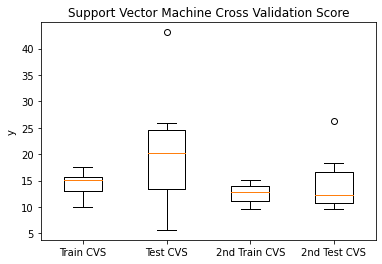

In [59]:
# Support Vector Machine.
def support_vector_machine(): 
    for i in range(100):
        svregressor = SVR()
        svregressor.fit(X_train, y_train[:, 0])
        y_pred = svregressor.predict(X_test)
        x_pred = svregressor.predict(y_test)
        
        svregressor_2 = SVR()
        svregressor_2.fit(X_train, y_train[:, 1])
        y_pred_2 = svregressor.predict(X_test)
        x_pred_2 = svregressor.predict(y_test)
        
    train_scores = cross_val_score(svregressor, X_train, y_train[:, 0], cv = 10, scoring = "neg_mean_squared_error")
    train_scores_2 = cross_val_score(svregressor, X_train, y_train[:, 1], cv = 10, scoring = "neg_mean_squared_error")
    test_scores = cross_val_score(svregressor, X_test, y_test[:, 0], cv = 10, scoring = "neg_mean_squared_error")
    test_scores_2 = cross_val_score(svregressor, X_test, y_test[:, 1], cv = 10, scoring = "neg_mean_squared_error")
    
    plt.figure()
    plt.title("Support Vector Machine Cross Validation Score")
    plt.boxplot([abs(train_scores), abs(test_scores), abs(train_scores_2), abs(test_scores_2)])
    plt.xticks([1, 2, 3, 4], ["Train CVS", "Test CVS", "2nd Train CVS", "2nd Test CVS"])
    plt.ylabel("y")
    plt.show()
    
support_vector_machine()

In [8]:
#PART 2 - OPTIMISATION
import random
# Task 2.1 - Generation of random solutions
file = open('Modules.txt', 'r')
contents = file.read()
file.close()

splitted = contents.split("\n")

# Extracting clashes from text file.
def get_clashes():
    clashes = []
    for i in range(len(splitted)):

        clashes.append(splitted[i].split("|"))
        
        clashes[i].pop(0)
        clashes[i].pop(0)
        clashes[i].pop(0)


    for i in range(len(clashes)):
        clashes[i].append(clashes[i][0].split(","))
        clashes[i].pop(0)
    
    return clashes

# Extracting number of labs for each module.
def get_lab_number():
    labs = []
    int_labs = []
    for i in range(len(splitted)):

        labs.append(splitted[i].split("|"))
        labs[i].pop(0)
        labs[i].pop(0)
        labs[i].pop(1)
        
    for i in range(len(labs)):
        int_labs.append(int(labs[i][0]))
    return int_labs
    
# Extracting module name.
def get_module_name():
    module = np.array([])
    for i in range(len(splitted)):
        module = np.concatenate((module, splitted[i].split("|")))
        
    module = module[0::4]
    return module

def lecture_lab_clash(lab, clashes, lecture):   
    # Check for clashes.
    c_constraints = 0
    p_constraints = 0
    if len(lab) < len(lecture):
        count = len(lab)
    else:
        count = len(lecture)
    
    for i in range(count):
        if lecture[i] == lab[i]:
            c_constraints = c_constraints + 1
        for j in range(i):
            if j < i:
                if lecture[i] == lab[j]: # if lab is before lecture
                    p_constraints = p_constraints + 1
                    # May need a break statement here - need to check
    
    return c_constraints, p_constraints

def module_clashes_array():
    module = get_module_name()
    clashes = get_clashes()

    module = np.split(module, 17)
    
    for i in range(len(module)):
        for j in range(len(clashes[i])):
            module[i] = np.concatenate([module[i], clashes[i][j]])
            
    return module
    
def modules_clash(lab, clashes, lecture):
    c_constraints = 0
    module_and_clashes = module_clashes_array()
    if len(lab) < len(lecture): # Finding the shortest array so the index won't be out of range
        count = len(lab)
    else:
        count = len(lecture)
      
    # Find the matching module
    for i in range(count):
        for j in range(len(module_and_clashes)):      
            if lecture[i] == module_and_clashes[j][0]:
                if lab[i] is not None and lab[i] in module_and_clashes[j] and lab[i] != module_and_clashes[j][0]:
                    c_constraints = c_constraints + 1
                    #print(f"Constraint found {lecture[i]} cannot be timetabled with {lab[i]}\n")
                    break
    return c_constraints


def generate_lab_sessions(labs, module):
    sessions = []
    for i in range(len(module)):
        for j in range(labs[i]):
            sessions.append(module[i])
            
    return sessions

def get_constraints_total(timetable, clashes):
    c_constraints = [int] * 4
    p_constraints = [int] * 2
    total_c_constraints = 0
    total_p_constraints = 0
    
    c_constraints[0], p_constraints[0] = lecture_lab_clash(timetable[1], clashes, timetable[0])
    c_constraints[1], p_constraints[1] = lecture_lab_clash(timetable[2], clashes, timetable[0])
    
    c_constraints[2] = modules_clash(timetable[1], clashes, timetable[0])
    c_constraints[3] = modules_clash(timetable[2], clashes, timetable[0])

    for i in range(len(c_constraints)):
        total_c_constraints = total_c_constraints + c_constraints[i]
    
    for i in range(len(p_constraints)):
        total_p_constraints = total_p_constraints + p_constraints[i]
        
    return total_c_constraints, total_p_constraints

def get_fitness(timetable):
    
    clashes = get_clashes()
    
    total_c_constraints, total_p_constraints = get_constraints_total(timetable, clashes)
    
    if total_c_constraints == 0 and total_p_constraints != 0:
        total_c_constraints = 1
    elif total_p_constraints == 0 and total_c_constraints != 0:
        total_p_constraints = 1
    
    fitness = total_c_constraints * total_p_constraints
    
    return fitness
    

def generate_solution():
    
    clashes = get_clashes()
    labs = get_lab_number()
    module = get_module_name()
    
    lecture_theatre = []
    lab_1 = []
    lab_2 = []
    
    lab = generate_lab_sessions(labs, module)
    
    total_c_constraints = 0
    total_p_constraints = 0
    
    # Assign lectures.
    for i in range(len(module)):
        
        lecture_theatre.append(module[i])
        
    # Assign labs.
    for i in range(len(lab)):

        lab_slot = np.random.randint(0,2)
        if len(lab_1) >= 20:
            lab_slot = 1
        if len(lab_2) >= 20:
            lab_slot = 0
        if lab_slot == 0:
            lab_1.append(lab[i])
        elif lab_slot == 1:
            lab_2.append(lab[i])
    
    # Put the sessions into the timetable array.
    timetable = np.empty([3, 20], dtype = object)
    for i in range(len(lecture_theatre)):
        timetable[0][i] = lecture_theatre[i]
    for i in range(len(lab_1)):
        timetable[1][i] = lab_1[i]
    for i in range(len(lab_2)):
        timetable[2][i] = lab_2[i]
    
    # Shuffle the lectures and labs so the solution is random.
    random.shuffle(timetable[0])
    random.shuffle(timetable[1])
    random.shuffle(timetable[2])
    
    total_c_constraints, total_p_constraints = get_constraints_total(timetable, clashes)
    
    fitness = get_fitness(timetable)

    return timetable, fitness
        





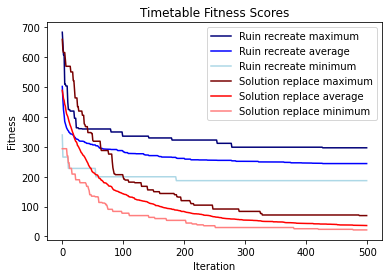

In [9]:
# Task 2.2 - Algorithm implementation
def ruin_recreate_mutate(parent):
    child = parent.copy()
    merged_labs = [child[1], child[2]]
    merged_labs_1d = []

    for i in range(len(merged_labs)):
        for j in range(len(merged_labs[i])):
            merged_labs_1d.append(merged_labs[i][j])

    
    random.shuffle(merged_labs_1d)
    #print(merged_labs_1d)
    for i in range(len(merged_labs_1d)):
        if i < 20:
            child[1][i] = merged_labs_1d[i]
        else:
            child[2][i - 20] = merged_labs_1d[i]
                    
    random.shuffle(child[0])
    return child

def session_replace_mutate(parent):
    child = parent.copy()
    idx = random.randint(0, 2)
    session_1 = random.randint(0, 19)
    session_2 = random.randint(0, 19)
    
    if idx == 1 or idx == 2:
        idx_2 = random.randint(1, 2)
        child[idx][session_1], child[idx_2][session_2] = child[idx_2][session_2], child[idx][session_1]
    else:
        child[idx][session_1], child[idx][session_2] = child[idx][session_2], child[idx][session_1]
    return child

def less_than_equal(a ,b):
    return a <= b

def hillclimber(Niter, mutation, j, iter_fitness):
    # Initialise a random solution
    parent, parent_fitness = generate_solution()
      
    # Loop for Niter iteration.
    for i in range(Niter):    
        
        iter_fitness[i][j] = parent_fitness
        
        # Mutate
        child = mutation(parent)

        # Evaluate
        child_fitness = get_fitness(child)

        # Pick the next parent solution
        if less_than_equal(child_fitness, parent_fitness):
            parent = child
            parent_fitness = child_fitness
        
    # End of optimisation, return best solution.
    return parent, parent_fitness

def calculate_average(iter_fitness):
    averages = []
    for i in range(500):
        total = 0
        for j in range(30):
            total = total + iter_fitness[i][j]
        averages.append(total / len(iter_fitness[i]))
    #average = round(average)
    
    return averages

def find_min_max(iter_fitness):
    maximums = []
    minimums = []
    sort = []
    for i in range(500):
        sort.append(sorted(iter_fitness[i]))
        minimums.append(sort[i][0])
        maximums.append(sort[i][-1])
    
    return minimums, maximums

def plot_data(iter_fitness_rr, iter_fitness_sr):
    averages_rr = calculate_average(iter_fitness_rr)
    averages_sr = calculate_average(iter_fitness_sr)

    minimums_rr, maximums_rr = find_min_max(iter_fitness_rr)
    minimums_sr, maximums_sr = find_min_max(iter_fitness_sr)

    iters = np.arange(500)

    plt.plot(iters, maximums_rr, color = '#000078', label = "Ruin recreate maximum")
    plt.plot(iters, averages_rr, color = 'b', label = "Ruin recreate average")
    plt.plot(iters, minimums_rr, color = '#ADD8E6', label = "Ruin recreate minimum")

    plt.plot(iters, maximums_sr, color = '#780000', label = "Solution replace maximum")
    plt.plot(iters, averages_sr, color = 'r', label = "Solution replace average")
    plt.plot(iters, minimums_sr, color = '#FF7F7F', label = "Solution replace minimum")

    plt.title("Timetable Fitness Scores")
    plt.legend()
    plt.ylabel("Fitness")
    plt.xlabel("Iteration")
    plt.show()

def main():      
    # Run hillclimber here
    fitness_list_ruin_recreate = []
    fitness_list_session_replace = []

    iter_fitness_rr = np.empty([500, 30], dtype = int)
    iter_fitness_sr = np.empty([500, 30], dtype = int)

    for i in range(30):  
        solution, fitness = hillclimber(500, ruin_recreate_mutate, i, iter_fitness_rr)

        fitness_list_ruin_recreate.append(fitness)

        solution, fitness = hillclimber(500, session_replace_mutate, i, iter_fitness_sr)   

        fitness_list_session_replace.append(fitness)
        
    plot_data(iter_fitness_rr, iter_fitness_sr)
    
main()

    

# Session replace is the best method, this is because the child keeps good features of the parent. Whereas ruin and recreate children
# are completely different from parents. As shown in the graph, this will lead to fitness scores being higher than they are in session replace, as session
# replace children can build on good features of their parents.
